In [134]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv(r'Life Expectancy Data.csv')

In [3]:
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1945,Pakistan,2012,Developing,65.7,165.0,369,0.04,59.659001,72.0,8046,...,72.0,2.76,72.0,0.1,1261.28967,177911533.0,19.8,2.2,0.529,7.6
966,Gambia,2011,Developing,59.8,277.0,3,3.41,0.000000,96.0,0,...,95.0,6.24,96.0,1.8,NaN,NaN,8.0,7.9,0.441,8.7
2860,Venezuela (Bolivarian Republic of),2013,Developing,73.8,159.0,9,6.71,0.000000,82.0,0,...,82.0,4.94,82.0,0.1,NaN,NaN,1.6,1.5,0.770,14.2
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,...,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
1437,Lao People's Democratic Republic,2004,Developing,64.0,252.0,12,3.53,0.000000,45.0,1491,...,46.0,4.54,45.0,0.2,NaN,NaN,1.1,1.2,0.485,8.6


In [4]:
columns = []
for i in data.columns:
    columns.append(i.strip())

for i,j in zip(columns, data.columns):
    data = data.rename(columns={j:i})

In [5]:
data.shape

(2938, 22)

In [6]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [28]:
countries = data['Country'].unique()

na_cols_dict = data.isna().sum().to_dict()

for i,j in list(na_cols_dict.items()):
    if (j==0):
        na_cols_dict.pop(i)

na_cols= list(na_cols_dict.keys())

for col in na_cols:
    for country in countries:
        data.loc[data['Country'] == country,col] = data.loc[data['Country'] == country, col]\
                                                        .fillna(data[data['Country']== country][col].mean())

In [42]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [33]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         648
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [37]:
data = data.dropna()

In [41]:
data.shape

(2128, 22)

In [38]:
data['Country'].value_counts()

Angola             16
Georgia            16
Solomon Islands    16
Vanuatu            16
Myanmar            16
                   ..
Argentina          16
Philippines        16
Peru               16
Austria            16
South Africa       16
Name: Country, Length: 133, dtype: int64

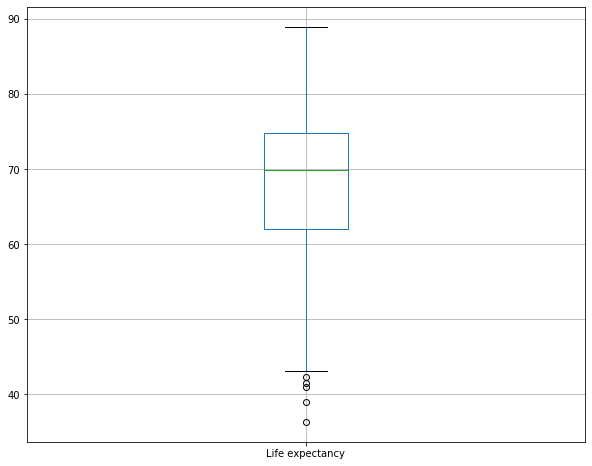

In [39]:
plt.figure(figsize = (10,8))
data.boxplot('Life expectancy')
plt.show()

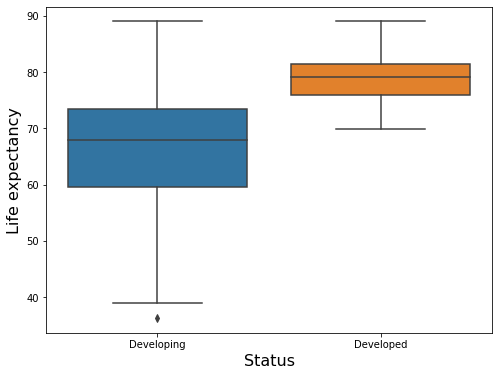

In [45]:
plt.figure(figsize = (8,6))
sns.boxplot('Status', 'Life expectancy', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Life expectancy', fontsize = 16)

plt.show()

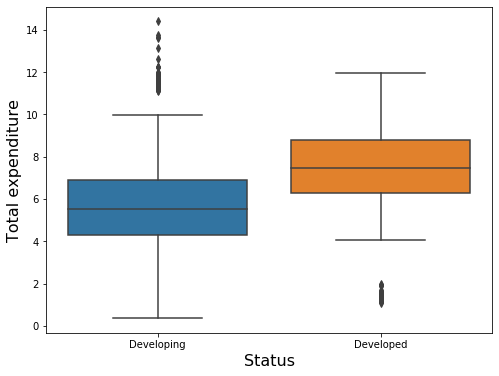

In [46]:
plt.figure(figsize = (8,6))
sns.boxplot('Status', 'Total expenditure', data = data)

plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)

plt.show()

In [47]:
data_corr = data.corr()

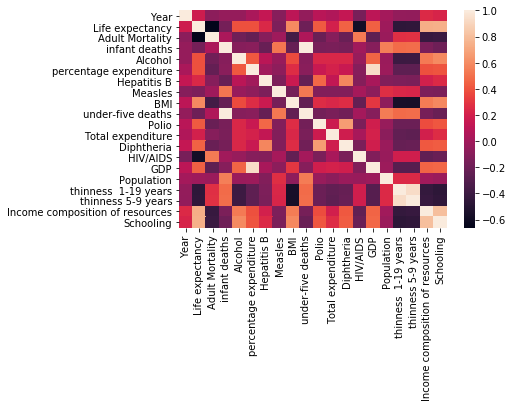

In [51]:
sns.heatmap(data_corr)

In [52]:
features = data.drop('Life expectancy', axis = 1)
target = data[['Life expectancy']]

In [53]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [54]:
target.sample(5)

,Life expectancy
980,74.5
99,74.4
863,58.5
592,63.5
1665,61.0


In [55]:
features = features.drop('Country', axis = 1)

In [57]:
categorical_features = features['Status'].copy()
categorical_features = pd.get_dummies(categorical_features)

In [59]:
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [60]:
numeric_features = features.drop(['Status'], axis = 1)

numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [63]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,-3.130328e-19,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,5.425902e-18,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,-2.626737e-16,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,6.365000e-17,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,-1.915239e-16,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,7.943207e-18,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,3.124067e-16,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,6.662382e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.316107e-16,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,-2.178969e-16,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [62]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                               columns = numeric_features.columns,
                               index = numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,-3.130328e-19,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,5.425902e-18,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,-2.626737e-16,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,6.365000e-17,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,-1.915239e-16,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,7.943207e-18,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,3.124067e-16,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,6.662382e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.316107e-16,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,-2.178969e-16,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [64]:
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [65]:
processed_features.shape

(2128, 21)

# Modelling

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target,
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [74]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32,
                                    input_shape = (x_train.shape[1],),
                                    activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    model.compile(loss = 'mse',
                  metrics = ['mae', 'mse'],
                  optimizer = optimizer)
    
    return model

In [75]:
model = build_single_layer_model()

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


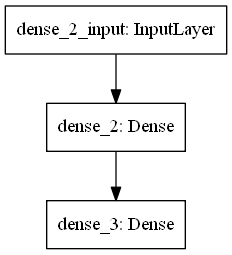

In [77]:
tf.keras.utils.plot_model(model)

In [78]:
num_epochs = 100

training_history = model.fit(x_train, y_train,
                            epochs = num_epochs,
                            validation_split = 0.2,
                            verbose = True)

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: 4459.5849 - mae: 66.1118 - mse: 4459.5849 - val_loss: 3798.9102 - val_mae: 61.1665 - val_mse: 3798.9102
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 3356.2667 - mae: 57.3059 - mse: 3356.2667 - val_loss: 2613.1399 - val_mae: 50.5177 - val_mse: 2613.1399
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 2226.1295 - mae: 46.3470 - mse: 2226.1295 - val_loss: 1562.8032 - val_mae: 38.6965 - val_mse: 1562.8032
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 1275.6301 - mae: 34.5559 - mse: 1275.6301 - val_loss: 827.5201 - val_mae: 27.7221 - val_mse: 827.5201
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 652.7460 - mae: 24.1583 - mse: 652.7460 - val_loss: 403.1156 - val_mae: 18.7468 - val_mse: 403.1156
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 306.3309 - mae: 15.8094 - mse: 306.3309 - val_lo

Epoch 50/100
36/36 [==============================] - 0s 2ms/step - loss: 7.5726 - mae: 1.9667 - mse: 7.5726 - val_loss: 7.1798 - val_mae: 1.8844 - val_mse: 7.1798
Epoch 51/100
36/36 [==============================] - 0s 2ms/step - loss: 6.9933 - mae: 1.9405 - mse: 6.9933 - val_loss: 7.0402 - val_mae: 1.8594 - val_mse: 7.0402
Epoch 52/100
36/36 [==============================] - 0s 2ms/step - loss: 7.6136 - mae: 1.9957 - mse: 7.6136 - val_loss: 7.1475 - val_mae: 1.8676 - val_mse: 7.1475
Epoch 53/100
36/36 [==============================] - 0s 2ms/step - loss: 7.0391 - mae: 1.9063 - mse: 7.0391 - val_loss: 7.1351 - val_mae: 1.8698 - val_mse: 7.1351
Epoch 54/100
36/36 [==============================] - 0s 2ms/step - loss: 6.5825 - mae: 1.8583 - mse: 6.5825 - val_loss: 7.0364 - val_mae: 1.8582 - val_mse: 7.0364
Epoch 55/100
36/36 [==============================] - 0s 2ms/step - loss: 6.7643 - mae: 1.8743 - mse: 6.7643 - val_loss: 7.0231 - val_mae: 1.8522 - val_mse: 7.0231
Epoch 56/100
36/

Epoch 100/100
36/36 [==============================] - 0s 2ms/step - loss: 4.7515 - mae: 1.5601 - mse: 4.7515 - val_loss: 6.1502 - val_mae: 1.7506 - val_mse: 6.1502


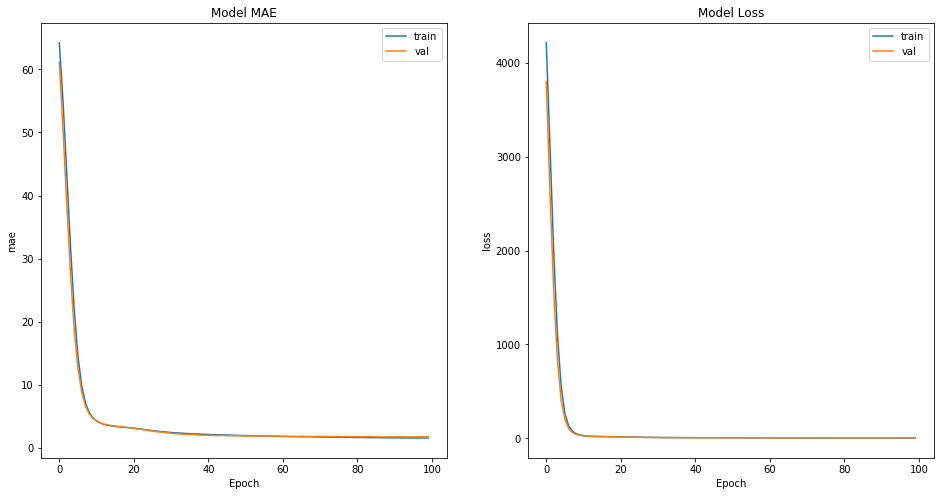

In [80]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])

plt.subplot(1,2,2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])

In [81]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 942us/step - loss: 6.2454 - mae: 1.8256 - mse: 6.2454


[6.245434761047363, 1.8255916833877563, 6.245434761047363]

In [82]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9357857035842951

In [84]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                            'y_pred': y_pred.flatten()}, 
                             index = range(len(y_pred)))
                            
pred_results.sample(10)

,y_test,y_pred
524,59.1,57.975605
274,76.0,69.760735
244,78.9,76.149773
0,72.7,73.103050
194,75.8,76.151207
241,67.9,69.214432
664,59.2,58.410313
345,65.5,67.464149
381,63.6,67.827705
249,73.7,73.078957


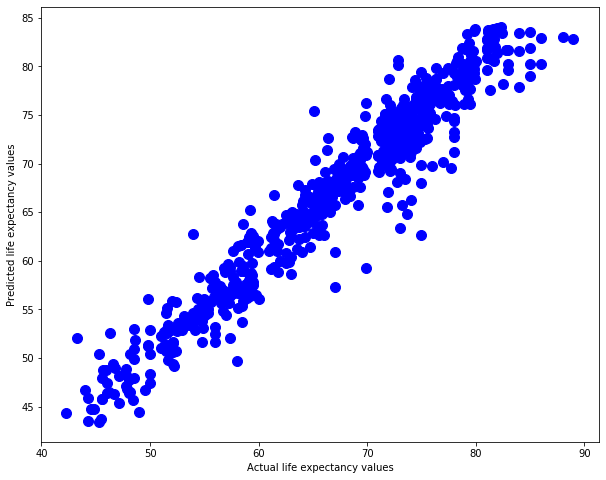

In [89]:
plt.figure(figsize=(10,8))

plt.scatter(y_test, y_pred, s=100, c='blue')
plt.xlabel('Actual life expectancy values')
plt.ylabel('Predicted life expectancy values')
plt.show()

In [90]:
def build_multiple_layer_model():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = 'mae', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

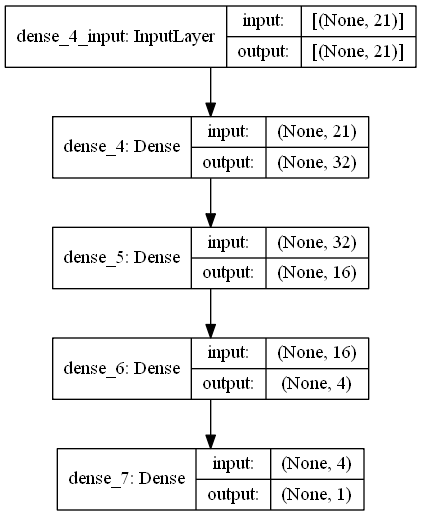

In [92]:
model = build_multiple_layer_model()

tf.keras.utils.plot_model(model, show_shapes=True)

In [111]:
logdir = os.path.join('seq_logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [112]:
training_history = model.fit(x_train, 
                             y_train,
                             validation_split = 0.2,
                             epochs = 500,
                             batch_size = 100,
                             callbacks = [tensorboard_callback])

Epoch 1/500
12/12 [==============================] - 2s 128ms/step - loss: 68.7665 - mae: 68.7665 - mse: 4817.5104 - val_loss: 69.6137 - val_mae: 69.6137 - val_mse: 4921.8442
Epoch 2/500
12/12 [==============================] - 0s 23ms/step - loss: 68.3089 - mae: 68.3089 - mse: 4756.0605 - val_loss: 69.5820 - val_mae: 69.5820 - val_mse: 4917.4658
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 68.1933 - mae: 68.1933 - mse: 4742.2532 - val_loss: 69.5659 - val_mae: 69.5659 - val_mse: 4915.2158
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 68.5104 - mae: 68.5104 - mse: 4779.9401 - val_loss: 69.5463 - val_mae: 69.5463 - val_mse: 4912.4458
Epoch 5/500
12/12 [==============================] - 0s 8ms/step - loss: 68.0017 - mae: 68.0017 - mse: 4720.4037 - val_loss: 69.4782 - val_mae: 69.4782 - val_mse: 4903.1636
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 67.9232 - mae: 67.9232 - mse: 4705.2963 - val_loss: 69.2244

12/12 [==============================] - 0s 4ms/step - loss: 4.3767 - mae: 4.3767 - mse: 32.6270 - val_loss: 4.4765 - val_mae: 4.4765 - val_mse: 35.2106
Epoch 50/500
12/12 [==============================] - 0s 4ms/step - loss: 4.2452 - mae: 4.2452 - mse: 31.7756 - val_loss: 4.3889 - val_mae: 4.3889 - val_mse: 33.8954
Epoch 51/500
12/12 [==============================] - 0s 5ms/step - loss: 4.3401 - mae: 4.3401 - mse: 33.1674 - val_loss: 4.3126 - val_mae: 4.3126 - val_mse: 32.8346
Epoch 52/500
12/12 [==============================] - 0s 4ms/step - loss: 4.1085 - mae: 4.1085 - mse: 29.8926 - val_loss: 4.2314 - val_mae: 4.2314 - val_mse: 31.7163
Epoch 53/500
12/12 [==============================] - 0s 5ms/step - loss: 4.1473 - mae: 4.1473 - mse: 30.0894 - val_loss: 4.1450 - val_mae: 4.1450 - val_mse: 30.5928
Epoch 54/500
12/12 [==============================] - 0s 5ms/step - loss: 3.9047 - mae: 3.9047 - mse: 27.1870 - val_loss: 4.0659 - val_mae: 4.0659 - val_mse: 29.5551
Epoch 55/500
12/1

12/12 [==============================] - 0s 5ms/step - loss: 2.6542 - mae: 2.6542 - mse: 13.3114 - val_loss: 2.9106 - val_mae: 2.9106 - val_mse: 16.4933
Epoch 99/500
12/12 [==============================] - 0s 5ms/step - loss: 2.6583 - mae: 2.6583 - mse: 13.4744 - val_loss: 2.8678 - val_mae: 2.8678 - val_mse: 15.9953
Epoch 100/500
12/12 [==============================] - 0s 4ms/step - loss: 2.5252 - mae: 2.5252 - mse: 12.6310 - val_loss: 2.8793 - val_mae: 2.8793 - val_mse: 16.0214
Epoch 101/500
12/12 [==============================] - 0s 4ms/step - loss: 2.5139 - mae: 2.5139 - mse: 12.3670 - val_loss: 2.8533 - val_mae: 2.8533 - val_mse: 15.7262
Epoch 102/500
12/12 [==============================] - 0s 4ms/step - loss: 2.5299 - mae: 2.5299 - mse: 13.2335 - val_loss: 2.8330 - val_mae: 2.8330 - val_mse: 15.7456
Epoch 103/500
12/12 [==============================] - 0s 5ms/step - loss: 2.6098 - mae: 2.6098 - mse: 13.8183 - val_loss: 2.8132 - val_mae: 2.8132 - val_mse: 15.4676
Epoch 104/500

12/12 [==============================] - 0s 5ms/step - loss: 2.3343 - mae: 2.3343 - mse: 11.5230 - val_loss: 2.5120 - val_mae: 2.5120 - val_mse: 12.5573
Epoch 148/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2900 - mae: 2.2900 - mse: 10.1690 - val_loss: 2.5207 - val_mae: 2.5207 - val_mse: 12.5352
Epoch 149/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2925 - mae: 2.2925 - mse: 10.8179 - val_loss: 2.5127 - val_mae: 2.5127 - val_mse: 12.7103
Epoch 150/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2799 - mae: 2.2799 - mse: 10.7587 - val_loss: 2.5235 - val_mae: 2.5235 - val_mse: 12.6401
Epoch 151/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2605 - mae: 2.2605 - mse: 10.5768 - val_loss: 2.4855 - val_mae: 2.4855 - val_mse: 12.3864
Epoch 152/500
12/12 [==============================] - 0s 5ms/step - loss: 2.1878 - mae: 2.1878 - mse: 10.1387 - val_loss: 2.5041 - val_mae: 2.5041 - val_mse: 12.6030
Epoch 153/50

12/12 [==============================] - 0s 4ms/step - loss: 2.0589 - mae: 2.0589 - mse: 9.5960 - val_loss: 2.3642 - val_mae: 2.3642 - val_mse: 11.4463
Epoch 197/500
12/12 [==============================] - 0s 5ms/step - loss: 2.0075 - mae: 2.0075 - mse: 8.7244 - val_loss: 2.3302 - val_mae: 2.3302 - val_mse: 11.2858
Epoch 198/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9850 - mae: 1.9850 - mse: 8.4469 - val_loss: 2.3628 - val_mae: 2.3628 - val_mse: 11.4140
Epoch 199/500
12/12 [==============================] - 0s 5ms/step - loss: 2.0999 - mae: 2.0999 - mse: 9.3944 - val_loss: 2.3739 - val_mae: 2.3739 - val_mse: 11.6198
Epoch 200/500
12/12 [==============================] - 0s 5ms/step - loss: 2.0895 - mae: 2.0895 - mse: 9.4472 - val_loss: 2.3926 - val_mae: 2.3926 - val_mse: 11.3928
Epoch 201/500
12/12 [==============================] - 0s 5ms/step - loss: 2.0280 - mae: 2.0280 - mse: 8.7648 - val_loss: 2.3493 - val_mae: 2.3493 - val_mse: 11.2151
Epoch 202/500
12/1

12/12 [==============================] - 0s 4ms/step - loss: 1.9457 - mae: 1.9457 - mse: 8.2763 - val_loss: 2.2721 - val_mae: 2.2721 - val_mse: 10.6081
Epoch 246/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8599 - mae: 1.8599 - mse: 7.7909 - val_loss: 2.2657 - val_mae: 2.2657 - val_mse: 10.5386
Epoch 247/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9370 - mae: 1.9370 - mse: 8.0243 - val_loss: 2.2852 - val_mae: 2.2852 - val_mse: 10.6026
Epoch 248/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9041 - mae: 1.9041 - mse: 8.0978 - val_loss: 2.2563 - val_mae: 2.2563 - val_mse: 10.4559
Epoch 249/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9190 - mae: 1.9190 - mse: 8.0151 - val_loss: 2.2607 - val_mae: 2.2607 - val_mse: 10.5912
Epoch 250/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9550 - mae: 1.9550 - mse: 8.3905 - val_loss: 2.2436 - val_mae: 2.2436 - val_mse: 10.4589
Epoch 251/500
12/1

12/12 [==============================] - 0s 5ms/step - loss: 1.7462 - mae: 1.7462 - mse: 6.6428 - val_loss: 2.1454 - val_mae: 2.1454 - val_mse: 9.6808
Epoch 295/500
12/12 [==============================] - 0s 5ms/step - loss: 1.8856 - mae: 1.8856 - mse: 8.3302 - val_loss: 2.1537 - val_mae: 2.1537 - val_mse: 9.6175
Epoch 296/500
12/12 [==============================] - 0s 5ms/step - loss: 1.8576 - mae: 1.8576 - mse: 7.9049 - val_loss: 2.1395 - val_mae: 2.1395 - val_mse: 9.7609
Epoch 297/500
12/12 [==============================] - 0s 5ms/step - loss: 1.8370 - mae: 1.8370 - mse: 7.6684 - val_loss: 2.1733 - val_mae: 2.1733 - val_mse: 9.8447
Epoch 298/500
12/12 [==============================] - 0s 5ms/step - loss: 1.8115 - mae: 1.8115 - mse: 7.3594 - val_loss: 2.1525 - val_mae: 2.1525 - val_mse: 9.7916
Epoch 299/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7563 - mae: 1.7563 - mse: 7.2024 - val_loss: 2.1968 - val_mae: 2.1968 - val_mse: 9.9976
Epoch 300/500
12/12 [===

Epoch 344/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7010 - mae: 1.7010 - mse: 6.5770 - val_loss: 2.1039 - val_mae: 2.1039 - val_mse: 9.1202
Epoch 345/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6758 - mae: 1.6758 - mse: 6.6192 - val_loss: 2.0705 - val_mae: 2.0705 - val_mse: 9.0089
Epoch 346/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6900 - mae: 1.6900 - mse: 6.5386 - val_loss: 2.0828 - val_mae: 2.0828 - val_mse: 9.1631
Epoch 347/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6475 - mae: 1.6475 - mse: 6.2673 - val_loss: 2.0971 - val_mae: 2.0971 - val_mse: 9.1122
Epoch 348/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6457 - mae: 1.6457 - mse: 6.1543 - val_loss: 2.0859 - val_mae: 2.0859 - val_mse: 9.0130
Epoch 349/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6871 - mae: 1.6871 - mse: 6.4868 - val_loss: 2.0949 - val_mae: 2.0949 - val_mse: 9.1690
Epoch 350/

Epoch 394/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6292 - mae: 1.6292 - mse: 6.4716 - val_loss: 2.0580 - val_mae: 2.0580 - val_mse: 8.8876
Epoch 395/500
12/12 [==============================] - 0s 4ms/step - loss: 1.6096 - mae: 1.6096 - mse: 6.1403 - val_loss: 2.0432 - val_mae: 2.0432 - val_mse: 8.9391
Epoch 396/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5762 - mae: 1.5762 - mse: 6.1840 - val_loss: 2.0523 - val_mae: 2.0523 - val_mse: 8.9471
Epoch 397/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5986 - mae: 1.5986 - mse: 5.9498 - val_loss: 2.0532 - val_mae: 2.0532 - val_mse: 9.0063
Epoch 398/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6161 - mae: 1.6161 - mse: 6.1840 - val_loss: 2.0523 - val_mae: 2.0523 - val_mse: 9.0467
Epoch 399/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6060 - mae: 1.6060 - mse: 6.1247 - val_loss: 2.0656 - val_mae: 2.0656 - val_mse: 9.0401
Epoch 400/

Epoch 444/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5310 - mae: 1.5310 - mse: 6.0051 - val_loss: 2.0352 - val_mae: 2.0352 - val_mse: 8.9093
Epoch 445/500
12/12 [==============================] - 0s 4ms/step - loss: 1.6436 - mae: 1.6436 - mse: 6.4662 - val_loss: 2.0077 - val_mae: 2.0077 - val_mse: 8.7723
Epoch 446/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5719 - mae: 1.5719 - mse: 5.8543 - val_loss: 2.0281 - val_mae: 2.0281 - val_mse: 8.9120
Epoch 447/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5706 - mae: 1.5706 - mse: 5.8157 - val_loss: 2.0299 - val_mae: 2.0299 - val_mse: 8.9206
Epoch 448/500
12/12 [==============================] - 0s 4ms/step - loss: 1.6162 - mae: 1.6162 - mse: 6.3118 - val_loss: 2.0230 - val_mae: 2.0230 - val_mse: 8.9437
Epoch 449/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4815 - mae: 1.4815 - mse: 5.2772 - val_loss: 2.0278 - val_mae: 2.0278 - val_mse: 8.9468
Epoch 450/

12/12 [==============================] - 0s 4ms/step - loss: 1.4989 - mae: 1.4989 - mse: 5.5654 - val_loss: 2.0183 - val_mae: 2.0183 - val_mse: 8.8713
Epoch 494/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5150 - mae: 1.5150 - mse: 5.7941 - val_loss: 2.0295 - val_mae: 2.0295 - val_mse: 8.9320
Epoch 495/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4559 - mae: 1.4559 - mse: 5.2723 - val_loss: 2.0115 - val_mae: 2.0115 - val_mse: 8.8088
Epoch 496/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4816 - mae: 1.4816 - mse: 5.4075 - val_loss: 2.0524 - val_mae: 2.0524 - val_mse: 8.9789
Epoch 497/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5390 - mae: 1.5390 - mse: 5.6808 - val_loss: 2.0242 - val_mae: 2.0242 - val_mse: 8.8146
Epoch 498/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4838 - mae: 1.4838 - mse: 5.3676 - val_loss: 2.0053 - val_mae: 2.0053 - val_mse: 8.8144
Epoch 499/500
12/12 [===

In [115]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 847us/step - loss: 1.9331 - mae: 1.9331 - mse: 7.4725


[1.9330925941467285, 1.9330925941467285, 7.472470760345459]

In [116]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9231695895535389

### SGD Model

In [117]:
def build_model_with_sgd():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation = 'relu'),
                              layers.Dense(16, activation = 'relu'),
                              layers.Dense(4, activation = 'relu'),
                              layers.Dense(1)])
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss = 'mae', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

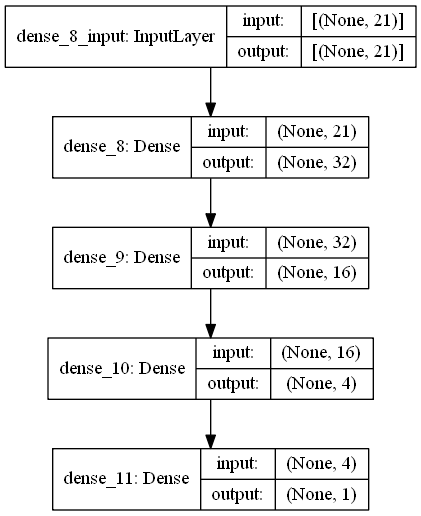

In [118]:
model_sgd = build_model_with_sgd()

tf.keras.utils.plot_model(model_sgd, show_shapes=True)

In [123]:
training_history = model_sgd.fit(x_train,
                                 y_train,
                                 validation_split = 0.2,
                                 epochs = 500,
                                 batch_size = 100)

Epoch 1/500
12/12 [==============================] - 0s 11ms/step - loss: 4.8417 - mae: 4.8417 - mse: 45.2134 - val_loss: 4.6515 - val_mae: 4.6515 - val_mse: 38.6923
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 4.7837 - mae: 4.7837 - mse: 43.9158 - val_loss: 4.7320 - val_mae: 4.7320 - val_mse: 39.5389
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 4.7441 - mae: 4.7441 - mse: 43.8992 - val_loss: 4.6277 - val_mae: 4.6277 - val_mse: 37.9963
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 4.7124 - mae: 4.7124 - mse: 43.1222 - val_loss: 4.5692 - val_mae: 4.5692 - val_mse: 37.0796
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 4.6571 - mae: 4.6571 - mse: 42.4768 - val_loss: 4.5235 - val_mae: 4.5235 - val_mse: 36.4099
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 4.6209 - mae: 4.6209 - mse: 41.6063 - val_loss: 4.5798 - val_mae: 4.5798 - val_mse: 37.0354
Epoch 7/5

12/12 [==============================] - 0s 4ms/step - loss: 3.4011 - mae: 3.4011 - mse: 24.0592 - val_loss: 3.3837 - val_mae: 3.3837 - val_mse: 21.5738
Epoch 51/500
12/12 [==============================] - 0s 5ms/step - loss: 3.3997 - mae: 3.3997 - mse: 23.9090 - val_loss: 3.4001 - val_mae: 3.4001 - val_mse: 21.5940
Epoch 52/500
12/12 [==============================] - 0s 5ms/step - loss: 3.3714 - mae: 3.3714 - mse: 23.6987 - val_loss: 3.3616 - val_mae: 3.3616 - val_mse: 21.3296
Epoch 53/500
12/12 [==============================] - 0s 5ms/step - loss: 3.3551 - mae: 3.3551 - mse: 23.5419 - val_loss: 3.3820 - val_mae: 3.3820 - val_mse: 21.8318
Epoch 54/500
12/12 [==============================] - 0s 5ms/step - loss: 3.3501 - mae: 3.3501 - mse: 23.4251 - val_loss: 3.3756 - val_mae: 3.3756 - val_mse: 21.1061
Epoch 55/500
12/12 [==============================] - 0s 5ms/step - loss: 3.3426 - mae: 3.3426 - mse: 23.2565 - val_loss: 3.3753 - val_mae: 3.3753 - val_mse: 21.2844
Epoch 56/500
12/1

12/12 [==============================] - 0s 5ms/step - loss: 2.8142 - mae: 2.8142 - mse: 17.0636 - val_loss: 2.8802 - val_mae: 2.8802 - val_mse: 16.9442
Epoch 100/500
12/12 [==============================] - 0s 4ms/step - loss: 2.8225 - mae: 2.8225 - mse: 16.8871 - val_loss: 2.8582 - val_mae: 2.8582 - val_mse: 16.4307
Epoch 101/500
12/12 [==============================] - 0s 4ms/step - loss: 2.7918 - mae: 2.7918 - mse: 16.6800 - val_loss: 2.8621 - val_mae: 2.8621 - val_mse: 16.4933
Epoch 102/500
12/12 [==============================] - 0s 4ms/step - loss: 2.7841 - mae: 2.7841 - mse: 16.5889 - val_loss: 2.8629 - val_mae: 2.8629 - val_mse: 16.8625
Epoch 103/500
12/12 [==============================] - 0s 5ms/step - loss: 2.7786 - mae: 2.7786 - mse: 16.4687 - val_loss: 2.9210 - val_mae: 2.9210 - val_mse: 16.7538
Epoch 104/500
12/12 [==============================] - 0s 4ms/step - loss: 2.7909 - mae: 2.7909 - mse: 16.4652 - val_loss: 2.9018 - val_mae: 2.9018 - val_mse: 16.5056
Epoch 105/50

12/12 [==============================] - 0s 4ms/step - loss: 2.4360 - mae: 2.4360 - mse: 12.8445 - val_loss: 2.6295 - val_mae: 2.6295 - val_mse: 14.7180
Epoch 149/500
12/12 [==============================] - 0s 4ms/step - loss: 2.4328 - mae: 2.4328 - mse: 12.7065 - val_loss: 2.6236 - val_mae: 2.6236 - val_mse: 14.8593
Epoch 150/500
12/12 [==============================] - 0s 4ms/step - loss: 2.4432 - mae: 2.4432 - mse: 12.7834 - val_loss: 2.6195 - val_mae: 2.6195 - val_mse: 14.3679
Epoch 151/500
12/12 [==============================] - 0s 4ms/step - loss: 2.4393 - mae: 2.4393 - mse: 12.8447 - val_loss: 2.6269 - val_mae: 2.6269 - val_mse: 14.4087
Epoch 152/500
12/12 [==============================] - 0s 4ms/step - loss: 2.4387 - mae: 2.4387 - mse: 12.7867 - val_loss: 2.6661 - val_mae: 2.6661 - val_mse: 14.3368
Epoch 153/500
12/12 [==============================] - 0s 4ms/step - loss: 2.4335 - mae: 2.4335 - mse: 12.6611 - val_loss: 2.5952 - val_mae: 2.5952 - val_mse: 14.3705
Epoch 154/50

12/12 [==============================] - 0s 4ms/step - loss: 2.2784 - mae: 2.2784 - mse: 11.2154 - val_loss: 2.4816 - val_mae: 2.4816 - val_mse: 13.7478
Epoch 198/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2889 - mae: 2.2889 - mse: 11.2460 - val_loss: 2.4848 - val_mae: 2.4848 - val_mse: 13.4128
Epoch 199/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2600 - mae: 2.2600 - mse: 11.1161 - val_loss: 2.4828 - val_mae: 2.4828 - val_mse: 13.3934
Epoch 200/500
12/12 [==============================] - 0s 4ms/step - loss: 2.2694 - mae: 2.2694 - mse: 11.1059 - val_loss: 2.4879 - val_mae: 2.4879 - val_mse: 13.3774
Epoch 201/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2616 - mae: 2.2616 - mse: 11.1384 - val_loss: 2.5045 - val_mae: 2.5045 - val_mse: 13.1050
Epoch 202/500
12/12 [==============================] - 0s 4ms/step - loss: 2.2564 - mae: 2.2564 - mse: 10.9903 - val_loss: 2.4613 - val_mae: 2.4613 - val_mse: 12.9634
Epoch 203/50

12/12 [==============================] - 0s 4ms/step - loss: 2.1838 - mae: 2.1838 - mse: 10.3078 - val_loss: 2.3856 - val_mae: 2.3856 - val_mse: 12.6037
Epoch 247/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1698 - mae: 2.1698 - mse: 10.2861 - val_loss: 2.3657 - val_mae: 2.3657 - val_mse: 12.2836
Epoch 248/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1828 - mae: 2.1828 - mse: 10.3046 - val_loss: 2.3604 - val_mae: 2.3604 - val_mse: 12.7551
Epoch 249/500
12/12 [==============================] - 0s 4ms/step - loss: 2.2001 - mae: 2.2001 - mse: 10.4329 - val_loss: 2.3808 - val_mae: 2.3808 - val_mse: 12.4802
Epoch 250/500
12/12 [==============================] - 0s 5ms/step - loss: 2.1692 - mae: 2.1692 - mse: 10.2005 - val_loss: 2.3623 - val_mae: 2.3623 - val_mse: 12.7160
Epoch 251/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1630 - mae: 2.1630 - mse: 10.2299 - val_loss: 2.3689 - val_mae: 2.3689 - val_mse: 12.3444
Epoch 252/50

12/12 [==============================] - 0s 4ms/step - loss: 2.1046 - mae: 2.1046 - mse: 9.6662 - val_loss: 2.3058 - val_mae: 2.3058 - val_mse: 11.6926
Epoch 296/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1123 - mae: 2.1123 - mse: 9.7663 - val_loss: 2.2983 - val_mae: 2.2983 - val_mse: 11.8456
Epoch 297/500
12/12 [==============================] - 0s 5ms/step - loss: 2.1094 - mae: 2.1094 - mse: 9.6475 - val_loss: 2.3170 - val_mae: 2.3170 - val_mse: 12.1115
Epoch 298/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1077 - mae: 2.1077 - mse: 9.6859 - val_loss: 2.3546 - val_mae: 2.3546 - val_mse: 12.0625
Epoch 299/500
12/12 [==============================] - 0s 5ms/step - loss: 2.0895 - mae: 2.0895 - mse: 9.5843 - val_loss: 2.3570 - val_mae: 2.3570 - val_mse: 11.7727
Epoch 300/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0985 - mae: 2.0985 - mse: 9.6508 - val_loss: 2.3305 - val_mae: 2.3305 - val_mse: 11.9947
Epoch 301/500
12/1

12/12 [==============================] - 0s 4ms/step - loss: 2.0435 - mae: 2.0435 - mse: 9.2206 - val_loss: 2.2082 - val_mae: 2.2082 - val_mse: 11.0709
Epoch 345/500
12/12 [==============================] - 0s 5ms/step - loss: 2.0337 - mae: 2.0337 - mse: 9.2589 - val_loss: 2.2398 - val_mae: 2.2398 - val_mse: 11.2038
Epoch 346/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0164 - mae: 2.0164 - mse: 9.1519 - val_loss: 2.2587 - val_mae: 2.2587 - val_mse: 11.7298
Epoch 347/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0465 - mae: 2.0465 - mse: 9.1244 - val_loss: 2.3028 - val_mae: 2.3028 - val_mse: 11.5631
Epoch 348/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0490 - mae: 2.0490 - mse: 9.2329 - val_loss: 2.3263 - val_mae: 2.3263 - val_mse: 12.3725
Epoch 349/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0344 - mae: 2.0344 - mse: 9.1013 - val_loss: 2.2235 - val_mae: 2.2235 - val_mse: 11.1769
Epoch 350/500
12/1

12/12 [==============================] - 0s 5ms/step - loss: 1.9889 - mae: 1.9889 - mse: 8.8654 - val_loss: 2.2306 - val_mae: 2.2306 - val_mse: 10.6765
Epoch 394/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9875 - mae: 1.9875 - mse: 8.7640 - val_loss: 2.1697 - val_mae: 2.1697 - val_mse: 10.5827
Epoch 395/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9740 - mae: 1.9740 - mse: 8.6271 - val_loss: 2.2388 - val_mae: 2.2388 - val_mse: 10.4926
Epoch 396/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9924 - mae: 1.9924 - mse: 8.8525 - val_loss: 2.1806 - val_mae: 2.1806 - val_mse: 10.9989
Epoch 397/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0047 - mae: 2.0047 - mse: 8.8009 - val_loss: 2.4437 - val_mae: 2.4437 - val_mse: 12.1517
Epoch 398/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9910 - mae: 1.9910 - mse: 8.7644 - val_loss: 2.3731 - val_mae: 2.3731 - val_mse: 11.7577
Epoch 399/500
12/1

12/12 [==============================] - 0s 4ms/step - loss: 1.9358 - mae: 1.9358 - mse: 8.3537 - val_loss: 2.1533 - val_mae: 2.1533 - val_mse: 10.1427
Epoch 443/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9170 - mae: 1.9170 - mse: 8.3034 - val_loss: 2.1352 - val_mae: 2.1352 - val_mse: 10.3871
Epoch 444/500
12/12 [==============================] - 0s 4ms/step - loss: 1.9196 - mae: 1.9196 - mse: 8.3398 - val_loss: 2.0976 - val_mae: 2.0976 - val_mse: 9.9186
Epoch 445/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9355 - mae: 1.9355 - mse: 8.3091 - val_loss: 2.1150 - val_mae: 2.1150 - val_mse: 9.9130
Epoch 446/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9261 - mae: 1.9261 - mse: 8.3292 - val_loss: 2.1362 - val_mae: 2.1362 - val_mse: 10.3892
Epoch 447/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9167 - mae: 1.9167 - mse: 8.2571 - val_loss: 2.0781 - val_mae: 2.0781 - val_mse: 9.9610
Epoch 448/500
12/12 [

12/12 [==============================] - 0s 5ms/step - loss: 1.9074 - mae: 1.9074 - mse: 8.1631 - val_loss: 2.0677 - val_mae: 2.0677 - val_mse: 9.7346
Epoch 492/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8455 - mae: 1.8455 - mse: 7.7793 - val_loss: 2.1037 - val_mae: 2.1037 - val_mse: 9.7291
Epoch 493/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8673 - mae: 1.8673 - mse: 7.8104 - val_loss: 2.0615 - val_mae: 2.0615 - val_mse: 9.3806
Epoch 494/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8733 - mae: 1.8733 - mse: 7.8819 - val_loss: 2.0404 - val_mae: 2.0404 - val_mse: 9.6695
Epoch 495/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8580 - mae: 1.8580 - mse: 7.8246 - val_loss: 2.0795 - val_mae: 2.0795 - val_mse: 9.8165
Epoch 496/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8660 - mae: 1.8660 - mse: 7.8199 - val_loss: 2.0365 - val_mae: 2.0365 - val_mse: 9.2629
Epoch 497/500
12/12 [===

In [124]:
model_sgd.evaluate(x_test, y_test)

22/22 [==============================] - 0s 673us/step - loss: 2.0316 - mae: 2.0316 - mse: 8.5546


[2.0316379070281982, 2.0316379070281982, 8.554596900939941]

In [125]:
y_pred = model_sgd.predict(x_test)

r2_score(y_test, y_pred)

0.912043382102361

### RMSProp Optimizer

In [126]:
def build_model_with_rmsprop():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1], ), activation = 'elu'),
                              layers.Dense(16, activation = 'elu'),
                              layers.Dense(4, activation = 'elu'),
                              layers.Dense(1)])
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(loss = 'mae', metrics = ['mae', 'mse'], optimizer = optimizer)
    
    return model

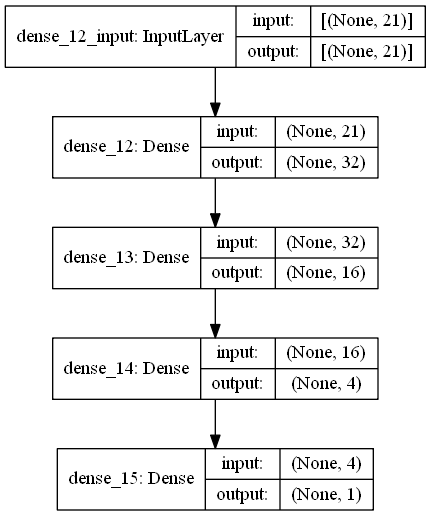

In [129]:
model_rmsprop = build_model_with_rmsprop()

tf.keras.utils.plot_model(model_sgd, show_shapes=True)

In [130]:
training_history = model_rmsprop.fit(x_train,
                                 y_train,
                                 validation_split = 0.2,
                                 epochs = 500,
                                 batch_size = 100)

Epoch 1/500
12/12 [==============================] - 1s 20ms/step - loss: 68.4477 - mae: 68.4477 - mse: 4773.4168 - val_loss: 69.2037 - val_mae: 69.2037 - val_mse: 4861.3086
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 67.6416 - mae: 67.6416 - mse: 4665.0468 - val_loss: 68.6217 - val_mae: 68.6217 - val_mse: 4780.4194
Epoch 3/500
12/12 [==============================] - 0s 5ms/step - loss: 67.2822 - mae: 67.2822 - mse: 4611.1190 - val_loss: 68.0332 - val_mae: 68.0332 - val_mse: 4699.2695
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 66.2392 - mae: 66.2392 - mse: 4477.1124 - val_loss: 67.3959 - val_mae: 67.3959 - val_mse: 4612.3276
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 66.0006 - mae: 66.0006 - mse: 4441.9399 - val_loss: 66.6799 - val_mae: 66.6799 - val_mse: 4515.2842
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 65.1148 - mae: 65.1148 - mse: 4324.9172 - val_loss: 65.8690 -

12/12 [==============================] - 0s 5ms/step - loss: 3.3726 - mae: 3.3726 - mse: 25.0650 - val_loss: 3.3650 - val_mae: 3.3650 - val_mse: 22.5118
Epoch 50/500
12/12 [==============================] - 0s 4ms/step - loss: 3.2968 - mae: 3.2968 - mse: 23.0375 - val_loss: 3.2366 - val_mae: 3.2366 - val_mse: 20.8558
Epoch 51/500
12/12 [==============================] - 0s 5ms/step - loss: 3.1689 - mae: 3.1689 - mse: 21.0422 - val_loss: 3.2131 - val_mae: 3.2131 - val_mse: 19.8121
Epoch 52/500
12/12 [==============================] - 0s 5ms/step - loss: 3.0959 - mae: 3.0959 - mse: 20.4076 - val_loss: 3.1406 - val_mae: 3.1406 - val_mse: 19.3759
Epoch 53/500
12/12 [==============================] - 0s 5ms/step - loss: 3.1716 - mae: 3.1716 - mse: 20.8976 - val_loss: 3.1540 - val_mae: 3.1540 - val_mse: 19.1723
Epoch 54/500
12/12 [==============================] - 0s 4ms/step - loss: 3.1307 - mae: 3.1307 - mse: 20.6672 - val_loss: 2.9693 - val_mae: 2.9693 - val_mse: 17.3202
Epoch 55/500
12/1

12/12 [==============================] - 0s 4ms/step - loss: 2.4452 - mae: 2.4452 - mse: 13.0831 - val_loss: 2.4010 - val_mae: 2.4010 - val_mse: 11.6264
Epoch 99/500
12/12 [==============================] - 0s 4ms/step - loss: 2.3659 - mae: 2.3659 - mse: 11.6357 - val_loss: 2.4388 - val_mae: 2.4388 - val_mse: 11.8569
Epoch 100/500
12/12 [==============================] - 0s 5ms/step - loss: 2.3612 - mae: 2.3612 - mse: 11.8228 - val_loss: 2.3739 - val_mae: 2.3739 - val_mse: 11.5032
Epoch 101/500
12/12 [==============================] - 0s 4ms/step - loss: 2.3983 - mae: 2.3983 - mse: 11.9086 - val_loss: 2.3383 - val_mae: 2.3383 - val_mse: 11.0983
Epoch 102/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2980 - mae: 2.2980 - mse: 11.0545 - val_loss: 2.5758 - val_mae: 2.5758 - val_mse: 12.4785
Epoch 103/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2896 - mae: 2.2896 - mse: 10.4587 - val_loss: 2.4273 - val_mae: 2.4273 - val_mse: 11.7598
Epoch 104/500

12/12 [==============================] - 0s 4ms/step - loss: 2.0888 - mae: 2.0888 - mse: 9.1372 - val_loss: 2.4428 - val_mae: 2.4428 - val_mse: 11.2191
Epoch 148/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0921 - mae: 2.0921 - mse: 9.0570 - val_loss: 2.2838 - val_mae: 2.2838 - val_mse: 10.2027
Epoch 149/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0637 - mae: 2.0637 - mse: 8.7502 - val_loss: 2.2308 - val_mae: 2.2308 - val_mse: 9.8857
Epoch 150/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1379 - mae: 2.1379 - mse: 9.3593 - val_loss: 2.2023 - val_mae: 2.2023 - val_mse: 9.8249
Epoch 151/500
12/12 [==============================] - 0s 4ms/step - loss: 2.0145 - mae: 2.0145 - mse: 8.7377 - val_loss: 2.2012 - val_mae: 2.2012 - val_mse: 9.7778
Epoch 152/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1187 - mae: 2.1187 - mse: 9.4541 - val_loss: 2.1697 - val_mae: 2.1697 - val_mse: 9.7355
Epoch 153/500
12/12 [=

Epoch 197/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9486 - mae: 1.9486 - mse: 8.0744 - val_loss: 2.1122 - val_mae: 2.1122 - val_mse: 9.2522
Epoch 198/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9139 - mae: 1.9139 - mse: 7.8043 - val_loss: 2.0144 - val_mae: 2.0144 - val_mse: 8.4952
Epoch 199/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9443 - mae: 1.9443 - mse: 7.8008 - val_loss: 2.1014 - val_mae: 2.1014 - val_mse: 8.9443
Epoch 200/500
12/12 [==============================] - 0s 5ms/step - loss: 1.8612 - mae: 1.8612 - mse: 7.3248 - val_loss: 2.0674 - val_mae: 2.0674 - val_mse: 8.9228
Epoch 201/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9272 - mae: 1.9272 - mse: 7.8633 - val_loss: 2.0252 - val_mae: 2.0252 - val_mse: 8.4775
Epoch 202/500
12/12 [==============================] - 0s 5ms/step - loss: 1.9112 - mae: 1.9112 - mse: 8.0995 - val_loss: 2.2135 - val_mae: 2.2135 - val_mse: 9.4540
Epoch 203/

Epoch 247/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7373 - mae: 1.7373 - mse: 6.3633 - val_loss: 1.8997 - val_mae: 1.8997 - val_mse: 7.6196
Epoch 248/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6786 - mae: 1.6786 - mse: 6.1849 - val_loss: 1.8802 - val_mae: 1.8802 - val_mse: 7.5816
Epoch 249/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7956 - mae: 1.7956 - mse: 6.9248 - val_loss: 1.9535 - val_mae: 1.9535 - val_mse: 7.9047
Epoch 250/500
12/12 [==============================] - 0s 4ms/step - loss: 1.8246 - mae: 1.8246 - mse: 6.9898 - val_loss: 1.9798 - val_mae: 1.9798 - val_mse: 8.0786
Epoch 251/500
12/12 [==============================] - 0s 4ms/step - loss: 1.7864 - mae: 1.7864 - mse: 6.7249 - val_loss: 1.9129 - val_mae: 1.9129 - val_mse: 7.9154
Epoch 252/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6829 - mae: 1.6829 - mse: 6.1466 - val_loss: 1.9617 - val_mae: 1.9617 - val_mse: 8.1987
Epoch 253/

Epoch 297/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6163 - mae: 1.6163 - mse: 5.6343 - val_loss: 1.8182 - val_mae: 1.8182 - val_mse: 7.0898
Epoch 298/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7364 - mae: 1.7364 - mse: 6.7733 - val_loss: 1.8603 - val_mae: 1.8603 - val_mse: 7.6493
Epoch 299/500
12/12 [==============================] - 0s 25ms/step - loss: 1.6310 - mae: 1.6310 - mse: 5.7277 - val_loss: 2.0101 - val_mae: 2.0101 - val_mse: 8.4339
Epoch 300/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7377 - mae: 1.7377 - mse: 6.7509 - val_loss: 1.9047 - val_mae: 1.9047 - val_mse: 8.0405
Epoch 301/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5871 - mae: 1.5871 - mse: 5.9247 - val_loss: 1.8876 - val_mae: 1.8876 - val_mse: 7.6040
Epoch 302/500
12/12 [==============================] - 0s 5ms/step - loss: 1.7094 - mae: 1.7094 - mse: 6.1787 - val_loss: 1.8815 - val_mae: 1.8815 - val_mse: 7.9317
Epoch 303

Epoch 347/500
12/12 [==============================] - 0s 4ms/step - loss: 1.6598 - mae: 1.6598 - mse: 6.1795 - val_loss: 1.7965 - val_mae: 1.7965 - val_mse: 7.0005
Epoch 348/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5677 - mae: 1.5677 - mse: 5.3214 - val_loss: 1.8019 - val_mae: 1.8019 - val_mse: 7.1420
Epoch 349/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5483 - mae: 1.5483 - mse: 5.3844 - val_loss: 1.8331 - val_mae: 1.8331 - val_mse: 7.4088
Epoch 350/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5862 - mae: 1.5862 - mse: 5.6543 - val_loss: 1.8467 - val_mae: 1.8467 - val_mse: 7.7238
Epoch 351/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5820 - mae: 1.5820 - mse: 5.5644 - val_loss: 2.0067 - val_mae: 2.0067 - val_mse: 8.5557
Epoch 352/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5501 - mae: 1.5501 - mse: 5.3081 - val_loss: 1.8167 - val_mae: 1.8167 - val_mse: 7.5879
Epoch 353/

Epoch 397/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5052 - mae: 1.5052 - mse: 5.0724 - val_loss: 1.7104 - val_mae: 1.7104 - val_mse: 6.8395
Epoch 398/500
12/12 [==============================] - 0s 5ms/step - loss: 1.6109 - mae: 1.6109 - mse: 5.8785 - val_loss: 1.7507 - val_mae: 1.7507 - val_mse: 7.2747
Epoch 399/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5659 - mae: 1.5659 - mse: 5.7426 - val_loss: 1.6983 - val_mae: 1.6983 - val_mse: 6.8603
Epoch 400/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5780 - mae: 1.5780 - mse: 5.6262 - val_loss: 1.7694 - val_mae: 1.7694 - val_mse: 6.7032
Epoch 401/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5498 - mae: 1.5498 - mse: 5.5031 - val_loss: 1.7590 - val_mae: 1.7590 - val_mse: 7.0092
Epoch 402/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5066 - mae: 1.5066 - mse: 5.2558 - val_loss: 1.7563 - val_mae: 1.7563 - val_mse: 7.3334
Epoch 403/

Epoch 447/500
12/12 [==============================] - 0s 4ms/step - loss: 1.6001 - mae: 1.6001 - mse: 6.0571 - val_loss: 1.7157 - val_mae: 1.7157 - val_mse: 7.1257
Epoch 448/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5551 - mae: 1.5551 - mse: 5.7816 - val_loss: 1.6574 - val_mae: 1.6574 - val_mse: 6.7427
Epoch 449/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4776 - mae: 1.4776 - mse: 5.1938 - val_loss: 1.6968 - val_mae: 1.6968 - val_mse: 6.8702
Epoch 450/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4309 - mae: 1.4309 - mse: 4.7868 - val_loss: 1.7246 - val_mae: 1.7246 - val_mse: 6.7246
Epoch 451/500
12/12 [==============================] - 0s 5ms/step - loss: 1.5242 - mae: 1.5242 - mse: 5.5144 - val_loss: 1.9491 - val_mae: 1.9491 - val_mse: 8.2608
Epoch 452/500
12/12 [==============================] - 0s 26ms/step - loss: 1.5636 - mae: 1.5636 - mse: 5.4815 - val_loss: 1.7678 - val_mae: 1.7678 - val_mse: 7.0982
Epoch 453

Epoch 497/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4763 - mae: 1.4763 - mse: 5.2129 - val_loss: 1.6530 - val_mae: 1.6530 - val_mse: 6.5499
Epoch 498/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4552 - mae: 1.4552 - mse: 4.7511 - val_loss: 1.6813 - val_mae: 1.6813 - val_mse: 6.8508
Epoch 499/500
12/12 [==============================] - 0s 4ms/step - loss: 1.5193 - mae: 1.5193 - mse: 5.4184 - val_loss: 1.7585 - val_mae: 1.7585 - val_mse: 7.3788
Epoch 500/500
12/12 [==============================] - 0s 4ms/step - loss: 1.4413 - mae: 1.4413 - mse: 4.8908 - val_loss: 1.7258 - val_mae: 1.7258 - val_mse: 6.8529


In [131]:
model_rmsprop.evaluate(x_test, y_test)

22/22 [==============================] - 0s 746us/step - loss: 1.8271 - mae: 1.8271 - mse: 6.9451


[1.8270936012268066, 1.8270936012268066, 6.945052146911621]

In [133]:
y_pred = model_rmsprop.predict(x_test)

r2_score(y_test, y_pred)

0.9285924200857145